# Laboratorio 4 - Inteligencia Artificial

In [2]:
import numpy as np
from math import *
import random as rd
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Task 1.1

In [3]:
#data = np.genfromtxt("./kc_house_data.csv", delimiter=",",names=True, dtype=None, encoding=None)
data = pd.read_csv("./kc_house_data.csv")

##### Se leyó el archivo csv utilizando la librería numpy. La data esta delimitada por ','

## Task 1.2

In [4]:
Y = np.array(data["price"])
X = np.array(data["sqft_living"])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [31]:
# se calcula la matriz 
def matriz_pol(datos, k):
    X = []
    for i in range(len(datos)):
        temp = []
        for j in range(k+1):
            temp.append(datos[i]**j)
        X.append(temp)

    X = np.array(X)
    return X

def matriz_Y(Y):
    Y = np.array(Y)
    Y = Y.reshape(len(Y), 1)
    return Y

# se calcula la matriz transpuesta
def matriz_trans(X):
    lineas = np.shape(X)[0]
    columnas = np.shape(X)[1]
    x = np.empty((columnas, lineas)) 

    for i in range(np.shape(X)[0]):
        for j in range(np.shape(X)[1]):
            x[j][i] = X[i][j]
    return x

# se crea W
def w_pol(k):
    
    W = []    
    for i in range(k+1):
        W.append(rd.randint(0, 100))        
    W = np.array(W)
    return W

## Task 1.3

Implementación vectorial del algoritmo de regresión lineal.

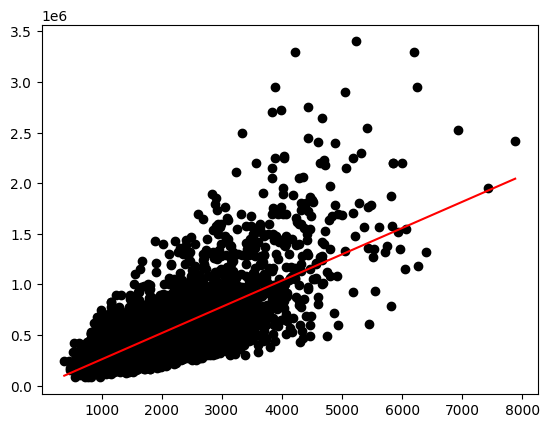

In [69]:
# Building the model
def crear_modelo(X_data, Y_data, polinomio):
    x = matriz_pol(X_data, polinomio) # X de forma de matriz de grado 1
    y = np.array(Y_data) 
    x_trans = x.transpose() # X transpuesta
    w = w_pol(polinomio) # W con valores aleatorios

    w_t = w.transpose()
    t = np.dot(w_t, x_trans)

    error = 0
    L = 0.000000012 # The learning Rate
    epochs = 1000 # The number of iterations

    n = len(X_data)
    # Performing Gradient Descent 
    for i in range(epochs): 

        y_pred = np.dot(x, w)
        y_y = np.subtract(y, y_pred)
        x_y = np.dot(x_trans, y_y)
        n_x_y = np.dot((-2/n),  x_y)
        l_n_x_y = np.dot(L, n_x_y)
        w = w - l_n_x_y

        error = (1/n) * np.dot((t - np.dot(x, w)).transpose(), (t - np.dot(x, w)))
    
    return w, error, x 

w, error, x = crear_modelo(X_train, Y_train, 1)

Y = np.dot(x, w)

max_indx = np.unravel_index(np.argmax(Y), Y.shape)
min_indx = np.unravel_index(np.argmin(Y), Y.shape)

x_maximo = x[max_indx]
x_minimo = x[min_indx]
y_maximo = Y[max_indx]
y_minimo = Y[min_indx]

x = [x_maximo[1], x_minimo[1]]
y = [y_maximo, y_minimo]

plt.plot(X_train, Y_train, 'o', color='black')
plt.plot(x, y, color='red')


Y es la multiplicacion de las matrices W calculadas con valores aleatorios y de la matriz X. Con esto, se calcularon los valores maximos y minimos en Y y se obtuvieron sus valores correspondientes en X para poder graficarlo.